# Breast Cancer Classification

The following script describes the use of the Logistic Regression model using the statsmodels library to classify occurrences of breast cancer in women. Processes such as multicollinearity analysis, descriptive statistics, application of the stepwise function (which removes non-significant coefficients), as well as interpretation of the results obtained, were performed.

Logistic regression models are trained with the aim of predicting the probability of a specific event occurring. In this case, the event that the trained model will seek to predict for each individual is whether they are a smoker or not, based on their biological signals (others will be classified as non-smokers).

Since logistic regression models are not as prone to overfitting as other models (such as decision trees and random forests), the model will be trained using all the data, and the fit will be tested on the same dataset. However, the goal is for the model to have the ability to predict new observations.

## Dataset Description

Breast cancer is the most common type of cancer among women worldwide. It accounts for 25% of all cancer cases and affected over 2.1 million people in 2015 alone. It develops when breast cells begin to grow uncontrollably. These cells typically form tumors that can be detected through X-ray examinations or felt as lumps in the breast area. The following dataset (obtained [here](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)) provides information about cells with the goal of classifying the tumor as benign (non-cancerous) or malignant (cancerous).

## Implementation


- Checking Dataset.


- Descriptive Statistics.


- Colinearity Analysis.


- Adjusting the Model.


- Interpreting Outputs.

***


## Checking the Dataset

In [1]:
# Libraries needed
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from stepwise_process.statsmodels import stepwise
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set()

In [2]:
# Checking dataset
df_c = pd.read_csv(r'Data/breast-cancer.csv')
df_c.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
# Checking NaN
df_c.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# Checking variable types
df_c.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# Checking dependent variable
df_c['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

As the column corresponding to the dependent variable, diagnosis, is in textual format ('M' and 'B'), these values will be transformed into 1 and 0, respectively. This transformation allows the applied models to predict the probability of the tumor in question being malignant.

In [6]:
# Transforming diagnosis
df_c['diagnosis'] = np.where(df_c['diagnosis']=='M', 1, 0)

In [7]:
# Dropping id
df_c = df_c.drop('id', 1)

## Descriptive Statistics

Descriptive statistics are useful for visualizing the behavior of data in a general way.

The means of the variables according to malignant or benign tumors will be displayed in a table and shown in a set of graphs.

In [8]:
# Checking the variables mean values
descriptive_stat = df_c.groupby('diagnosis').agg('mean').T
descriptive_stat

diagnosis                         0            1
radius_mean               12.146524    17.462830
texture_mean              17.914762    21.604906
perimeter_mean            78.075406   115.365377
area_mean                462.790196   978.376415
smoothness_mean            0.092478     0.102898
compactness_mean           0.080085     0.145188
concavity_mean             0.046058     0.160775
concave points_mean        0.025717     0.087990
symmetry_mean              0.174186     0.192909
fractal_dimension_mean     0.062867     0.062680
radius_se                  0.284082     0.609083
texture_se                 1.220380     1.210915
perimeter_se               2.000321     4.323929
area_se                   21.135148    72.672406
smoothness_se              0.007196     0.006780
compactness_se             0.021438     0.032281
concavity_se               0.025997     0.041824
concave points_se          0.009858     0.015060
symmetry_se                0.020584     0.020472
fractal_dimension_se       0.003636     0.004062
radius_worst              13.379801    21.134811
texture_worst             23.515070    29.318208
perimeter_worst           87.005938   141.370330
area_worst               558.899440  1422.286321
smoothness_worst           0.124959     0.144845
compactness_worst          0.182673     0.374824
concavity_worst            0.166238     0.450606
concave points_worst       0.074444     0.182237
symmetry_worst             0.270246     0.323468
fractal_dimension_worst    0.079442     0.091530

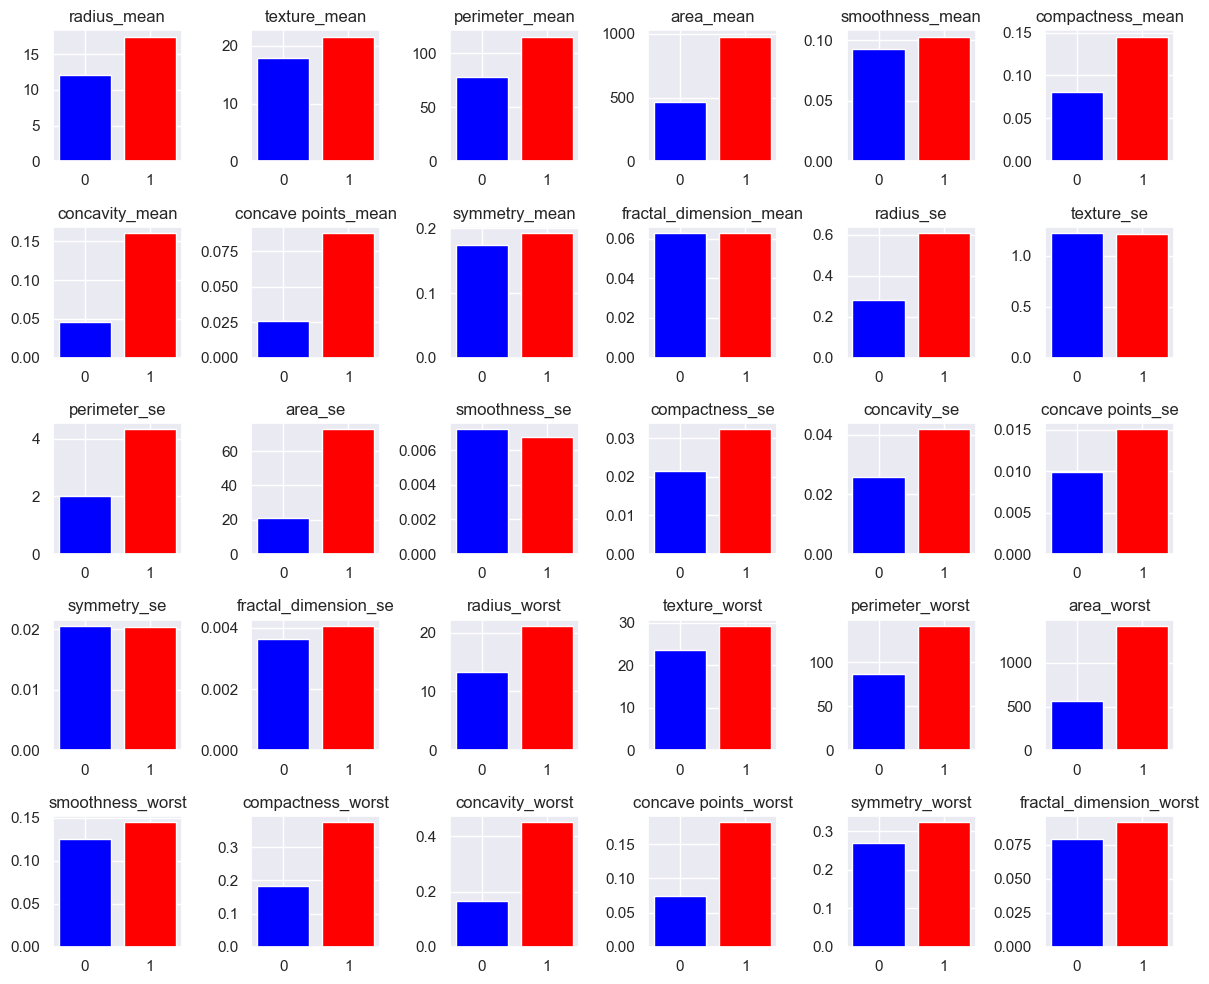

In [9]:
# Plotting graphs
c = 0
fig, axes = plt.subplots(5, 6, figsize=(12, 10))
for i in range(5):
    for j in range(6):
        colors = ['blue', 'red']
        axes[i, j].bar(descriptive_stat.loc[descriptive_stat.index[c]].index, descriptive_stat.loc[descriptive_stat.index[c]].values, color=colors)
        axes[i, j].set_title(f'{descriptive_stat.index[c]}')
        c += 1
plt.tight_layout();

The above graphs display in red the means of the parameters for malignant tumors, while in blue they represent the same measures for benign tumors.

We can observe that, in most cases, the means of the variables are higher for malignant tumors.

## Colinearity Analysis

Colinearity analysis, also known as multicollinearity analysis, is a statistical technique used to assess the degree of correlation or linear dependence between predictor variables in a regression model. It examines the relationships among the independent variables to determine if there is a high degree of correlation between them.

One of the most common ways to observe multicollinearity analysis is through the correlation matrix. It displays the correlations between all combinations of independent variables in a dataset.

Correlations close to 1 or -1 indicate a perfect positive or negative linear relationship between the variables, respectively. This can be a sign of multicollinearity.

The matrix considers the correlation between the variables contained in the column and the corresponding index. The values on the main diagonal will always be 1 because it represents the correlation between the same set of data.

In [10]:
# Correlation Matrix
df_c.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

The excessive number of variables makes it difficult to evaluate the matrix in this way. Therefore, the matrix will be plotted using a color scale, where correlations closer to 1 will have darker shades of blue, while those closer to -1 will have lighter shades.

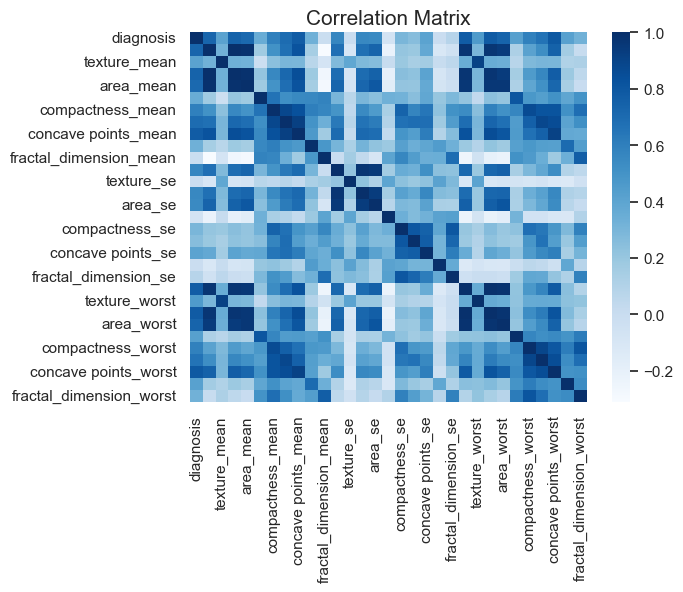

In [11]:
# Plotting the correlation matrix
sns.heatmap(df_c.corr(), cmap="Blues")
plt.title('Correlation Matrix', size=15);

Since there are no values close to -1, the lightest point on the scale was -0.2 (indicating a weak negative correlation). However, as observed in the matrix, there are some off-diagonal values that are nearly as dark as the main diagonal.

In other words, there are attributes that have nearly perfect correlations with each other. Including these attributes may not be ideal for the linear regression model. Therefore, if a column has more than 97% correlation (positive or negative) with another column, it will be disregarded.

In [12]:
# Creating a Series containing all values from the Correlation Matrix
corr_series = df_c.corr().stack()

In [13]:
# Checking the higly correlated columns
corr_series.loc[((corr_series>.97)|(corr_series<-.97))&(corr_series!=1)].to_frame().sort_values(by=0)

0
perimeter_mean  perimeter_worst  0.970387
perimeter_worst perimeter_mean   0.970387
radius_se       perimeter_se     0.972794
perimeter_se    radius_se        0.972794
perimeter_worst area_worst       0.977578
area_worst      perimeter_worst  0.977578
radius_worst    area_worst       0.984015
area_worst      radius_worst     0.984015
perimeter_mean  area_mean        0.986507
area_mean       perimeter_mean   0.986507
radius_mean     area_mean        0.987357
area_mean       radius_mean      0.987357
radius_worst    perimeter_worst  0.993708
perimeter_worst radius_worst     0.993708
radius_mean     perimeter_mean   0.997855
perimeter_mean  radius_mean      0.997855

In [14]:
# Dropping columns
df_c = df_c.drop(['radius_worst', 'area_mean', 'perimeter_mean', 'perimeter_se', 'perimeter_worst'], 1)

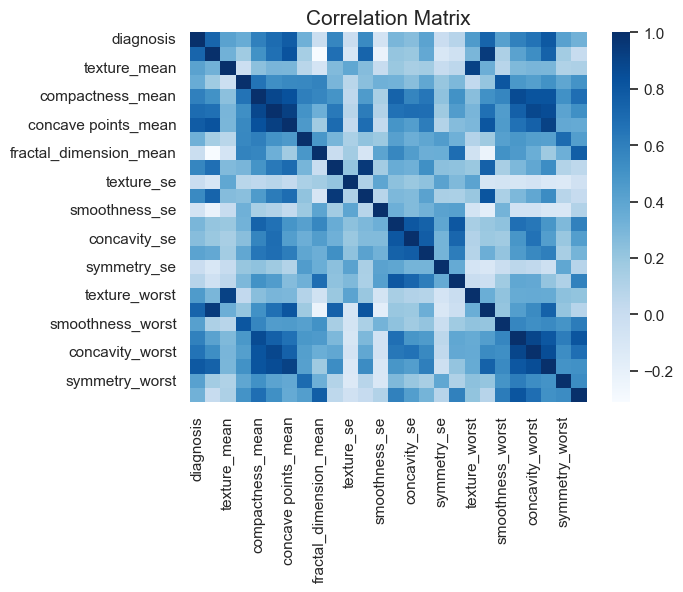

In [15]:
# Plotting the correlation matrix
sns.heatmap(df_c.corr(), cmap="Blues")
plt.title('Correlation Matrix', size=15);

After excluding the variables, although there are still columns with high correlation, there are no longer columns with nearly perfect correlation (with shades of blue as dark as those on the main diagonal).

In [16]:
# Creating a new Series containing all values from the Correlation Matrix
corr_series = df_c.corr().stack()

In [17]:
# Checking again the higly correlated columns
corr_series.loc[((corr_series>.98)|(corr_series<-.98))&(corr_series!=1)].to_frame().sort_values(by=0)

Empty DataFrame
Columns: [0]
Index: []

As you can see in the graph, there are still highly correlated variables, but there are no correlations above 98% (in absolute value) in the dataset. Without removing these columns, it is possible that the model may not be able to be trained successfully.

## Adjusting the Model

In [18]:
# Separating dependent and predictor variables
y = df_c['diagnosis'].values
X = df_c.drop('diagnosis', 1).values

In [19]:
# Adjusting the model
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

         Current function value: 0.027206
         Iterations: 35


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      543
Method:                           MLE   Df Model:                           25
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.9588
Time:                        11:30:48   Log-Likelihood:                -15.480
converged:                      False   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                6.737e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.5215     43.297     -1.906      0.057    -167.382       2.339
x1            -5.0076      2.785     -1.798      0.072     -10.467       0.452
x2             0.1253      0.534      0.234      0.815      -0.922       1.172
x3           244.2884    219.070      1.115      0.265    -185.081     673.658
x4          -306.8437    163.707     -1.874      0.061    -627.703      14.016
x5           173.0889     99.945      1.732      0.083     -22.799     368.977
x6           181.7551    179.264      1.014      0.311    -169.597     533.107
x7           -79.3267     59.316     -1.337      0.181    -195.584      36.930
x8           220.3499    374.787      0.588      0.557    -514.219     954.919
x9            13.1935     39.122      0.337      0.736     -63.483      89.870
x10           -4.4314      4.057     -1.092      0.275     -12.383       3.520
x11            0.1477      0.475      0.311      0.756      -0.783       1.079
x12          480.0829    570.893      0.841      0.400    -638.846    1599.012
x13          425.6757    283.694      1.500      0.133    -130.354     981.706
x14         -307.1794    157.135     -1.955      0.051    -615.158       0.799
x15         1539.2086    787.773      1.954      0.051      -4.798    3083.215
x16         -274.4127    266.493     -1.030      0.303    -796.730     247.904
x17        -5552.8761   2877.762     -1.930      0.054   -1.12e+04      87.433
x18            0.8794      0.514      1.712      0.087      -0.128       1.886
x19            0.0670      0.033      2.058      0.040       0.003       0.131
x20          -69.1272    128.370     -0.538      0.590    -320.729     182.474
x21          -25.6990     45.519     -0.565      0.572    -114.915      63.517
x22           17.9064     27.280      0.656      0.512     -35.562      71.375
x23           -3.3186     80.361     -0.041      0.967    -160.824     154.187
x24           70.2245     44.541      1.577      0.115     -17.074     157.523
x25          586.5573    329.906      1.778      0.075     -60.046    1233.160
==============================================================================

Possibly complete quasi-separation: A fraction 0.85 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Most of the p-values of the coefficients are greater than 0.05 (and therefore, not statistically significant). These values may still be indicative of high collinearity among the variables. Therefore, the model will be retrained using the *statsmodels.formula.api* library to enable the application of the *stepwis*e function, which gradually removes non-significant coefficients.

To do this, it is necessary to establish the formula for the model's input.

In [21]:
# Adjusting column names
new_columns = []
for col in df_c.columns:
    if ' ' in col:
        new_columns.append(col.replace(' ', '_'))
    else:
        new_columns.append(col)
df_c.columns = new_columns

In [22]:
# Creating the formula
formula = 'diagnosis ~ radius_mean'
for col in df_c.columns[2:]:
    formula += f' + {col}'
    
# Model's formula
formula

'diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + texture_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst'

In [23]:
# Creating the model
logit_model_f = smf.glm(formula=formula, data=df_c,
                         family=sm.families.Binomial()).fit()

logit_model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      543
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.480
Date:                Fri, 15 Mar 2024   Deviance:                       30.960
Time:                        11:30:48   Pearson chi2:                     384.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.7181
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -82.0936     43.083     -1.905      0.057    -166.535       2.348
radius_mean                -5.0035      2.778     -1.801      0.072     -10.447       0.440
texture_mean                0.1243      0.533      0.233      0.815      -0.920       1.168
smoothness_mean           242.4282    217.949      1.112      0.266    -184.743     669.600
compactness_mean         -305.5571    163.131     -1.873      0.061    -625.287      14.173
concavity_mean            172.2384     99.549      1.730      0.084     -22.875     367.351
concave_points_mean       181.8604    178.894      1.017      0.309    -168.765     532.485
symmetry_mean             -78.9344     59.093     -1.336      0.182    -194.755      36.886
fractal_dimension_mean    219.8206    374.186      0.587      0.557    -513.570     953.211
radius_se                  13.2155     39.010      0.339      0.735     -63.243      89.673
texture_se                 -4.4091      4.040     -1.091      0.275     -12.327       3.509
area_se                     0.1458      0.473      0.308      0.758      -0.782       1.073
smoothness_se             476.6280    569.669      0.837      0.403    -639.903    1593.159
compactness_se            422.4873    282.233      1.497      0.134    -130.680     975.654
concavity_se             -305.8216    156.202     -1.958      0.050    -611.973       0.330
concave_points_se        1533.3843    784.175      1.955      0.051      -3.571    3070.340
symmetry_se              -272.6375    265.596     -1.027      0.305    -793.196     247.921
fractal_dimension_se    -5515.0606   2859.361     -1.929      0.054   -1.11e+04      89.184
texture_worst               0.8767      0.512      1.713      0.087      -0.126       1.880
area_worst                  0.0669      0.032      2.061      0.039       0.003       0.131
smoothness_worst          -68.3349    127.820     -0.535      0.593    -318.858     182.189
compactness_worst         -25.4517     45.374     -0.561      0.575    -114.383      63.479
concavity_worst            17.8177     27.190      0.655      0.512     -35.474      71.110
concave_points_worst       -3.3354     80.178     -0.042      0.967    -160.482     153.811
symmetry_worst             69.9460     44.351      1.577      0.115     -16.981     156.873
fractal_dimension_worst   582.6525    327.854      1.777      0.076     -59.930    1225.235
===========================================================================================
"""

The values are practically the same, but now it is possible to apply the stepwise function.

In [24]:
# Stepwise
sm_model_step = stepwise(logit_model_f)

Regression type: GLM 

Estimating model...: 
 diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + texture_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst

 Family type...: 
 Binomial

 Discarding atribute "concave_points_worst" with p-value equal to 0.9668178557981083 

Estimating model...: 
 diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + area_se + smoothness_se + compactness_se + concavity_se + concave_points_se + symmetry_se + fractal_dimension_se + texture_worst + area_worst + smoothness_worst + compactness_worst + 

The number of parameters in the model has significantly decreased, now containing only the statistically significant ones.

## Interpreting Outputs 

Based on the log-likelihood value (-22.873 for a dataset with over 500 values, where a value close to 0 indicates a better fit), we can observe that, initially, the model appears to have a good fit to the data.

However, in order for the model to make effective classifications, a cutoff point needs to be established. The model can predict the probability of a specific event occurring (in this case, the probability of a tumor being malignant), but the actual classification is determined by setting a threshold to classify the event based on its probability.

Initially, a cutoff of 0.5 will be chosen, which means that if the probability of a tumor being malignant is greater than or equal to 0.5, it will be classified as malignant.

In [25]:
# Predicting (cutoff 0.5)
df_c['pred_diagnosis_M'] = np.where(sm_model_step.predict() > 0.5, 1, 0)

In [26]:
# Creating the Confusion Matrix
conf_mat = pd.DataFrame(index=[1,0], columns=[1,0])
for i in conf_mat.index:
    for j in conf_mat.columns:
        conf_mat[j].loc[i] = int(len(df_c.loc[(df_c['diagnosis']==j)&(df_c['pred_diagnosis_M']==i)]))


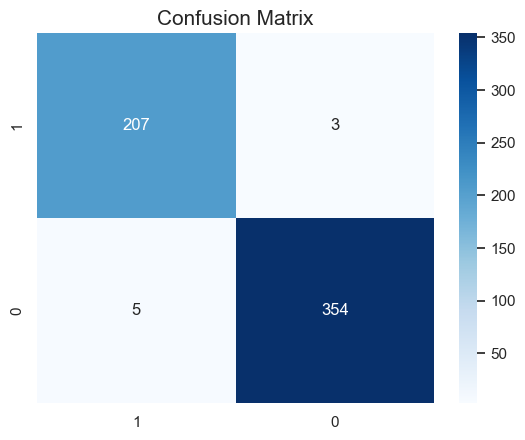

In [27]:
# Plotting the confusion Matrix
sns.heatmap(conf_mat.astype(int), cmap="Blues", annot=True, fmt='g')
plt.title('Confusion Matrix', size=15);

The Confusion Matrix indicates:

- True positives (TP): 207 - The number of samples correctly classified as positive (malignant class).

- False negatives (FN): 5 - The number of samples incorrectly classified as negative (benign class) when they are actually positive (malignant class).

- False positives (FP): 3 - The number of samples incorrectly classified as positive (malignant class) when they are actually negative (benign class).

- True negatives (TN): 354 - The number of samples correctly classified as negative (benign class).

In [28]:
# Calculating accuracy
accuracy = (conf_mat[0].loc[0] + conf_mat[1].loc[1])/conf_mat.sum().sum()
accuracy

0.9859402460456942

In [29]:
# Calculating precision
precision = conf_mat[1].loc[1]/conf_mat.sum(1)[1]
precision

0.9857142857142858

In [30]:
# Calculating sensitivity
recall = conf_mat[1].loc[1]/conf_mat.sum(0)[1]
recall

0.9764150943396226

In [31]:
# Calculating F1 Score
f1_score = (precision * recall * 2) / (precision + recall)
f1_score

0.981042654028436

In [32]:
sm_model_step.predict()

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99991260e-01, 1.00000000e+00, 9.99998184e-01,
       9.99998561e-01, 1.00000000e+00, 9.99987349e-01, 1.00000000e+00,
       1.00000000e+00, 8.19705393e-01, 9.99950852e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.78380349e-03,
       3.48982340e-08, 4.69713692e-07, 9.99999972e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999995e-01, 1.00000000e+00,
       1.00000000e+00, 9.99820217e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99492873e-01, 2.85071841e-07, 8.07259285e-01, 9.91020022e-01,
       1.40013656e-01, 9.56218851e-01, 1.00000000e+00, 9.99994739e-01,
       9.90182083e-01, 1.00000000e+00, 2.99316153e-09, 9.99999276e-01,
       7.63762096e-06, 3.42581860e-02, 3.74141508e-06, 1.33038013e-06,
       5.50838297e-07, 9.99999959e-01, 9.99943268e-01, 2.01283279e-05,
      

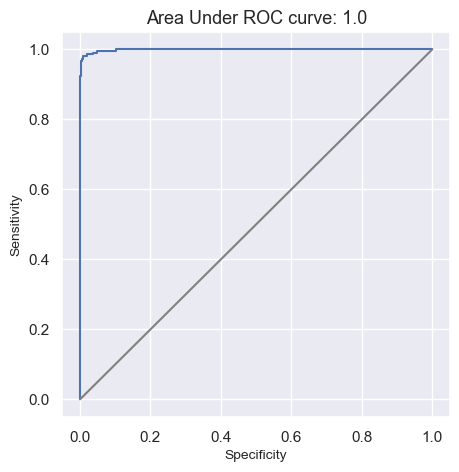

In [33]:
# ROC curve
fpr, tpr, thresholds = roc_curve(df_c['diagnosis'],sm_model_step.predict())
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, color='gray')
plt.title(f"Area Under ROC curve: {round(roc_auc,2)}", fontsize=13)
plt.xlabel("Specificity", fontsize=10)
plt.ylabel("Sensitivity", fontsize=10)
plt.show()

The high values of accuracy, precision, recall, and F1-score obtained from the confusion matrix indicate that the model has been successful in predicting tumor types. These measures take into account the cutoff of 0.5.

On the other hand, the area under the ROC curve (AUC) is a measure that evaluates the overall performance of the model at different classification thresholds. A value of 1 indicates a perfect performance, while a value of 0.5 indicates a random performance. In this case, the value of 0.98 indicates a good performance of the model in classification.
